Importing Libraries



In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import re
from shutil import copyfile
from glob import glob
from json import load, dump
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Model, Sequential
from os.path import basename
from time import time

print(tf.__version__)

2.12.0


Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Already Created .JSON files

In [ ]:
tiny_class_dict = load(open('/content/drive/MyDrive/ACG/Model_Train/class_dict_2.json', 'r'))
tiny_val_class_dict = load(open('/content/drive/MyDrive/ACG/Model_Train/val_class_dict_2.json', 'r'))

Converting Train,Test,Validation data to JPEG

In [ ]:
#@title
import os
from PIL import Image

path = "/content/drive/MyDrive/ACG/Model_Train/Train_Data/Safe_images/images"

for filename in os.listdir(path):
    if filename.endswith(".jpg"):
        # Rename file
        base_filename = os.path.splitext(filename)[0]
        new_filename = "Safe_" + base_filename + ".JPEG"
        os.rename(os.path.join(path, filename), os.path.join(path, new_filename))

        # Convert file type to JPEG and overwrite original file
        img_path = os.path.join(path, new_filename)
        img = Image.open(img_path)
        img_path_jpg = os.path.join(path, base_filename + ".JPEG")
        img.save(img_path_jpg, "JPEG")
        os.remove(img_path)


In [ ]:
#@title
path = "/content/drive/MyDrive/ACG/Model_Train/Train_Data/Unsafe_images/images"

for filename in os.listdir(path):
    if filename.endswith(".jpg"):
        # Rename file
        base_filename = os.path.splitext(filename)[0]
        new_filename = "Unsafe_" + base_filename + ".JPEG"
        os.rename(os.path.join(path, filename), os.path.join(path, new_filename))

        # Convert file type to JPEG and overwrite original file
        img_path = os.path.join(path, new_filename)
        img = Image.open(img_path)
        img_path_jpg = os.path.join(path, base_filename + ".JPEG")
        img.save(img_path_jpg, "JPEG")
        os.remove(img_path)


In [ ]:
#@title
path = "/content/drive/MyDrive/ACG/Model_Train/Val_Data/test_images"
for filename in os.listdir(path):
    if filename.endswith(".jpg"):
         #Rename file
        base_filename = os.path.splitext(filename)[0]
        new_filename = "Unsafe_" + base_filename + ".JPEG"
        os.rename(os.path.join(path, filename), os.path.join(path, new_filename))

        # Convert file type to JPEG and overwrite original file
        img_path = os.path.join(path, new_filename)
        img = Image.open(img_path)
        img_path_jpg = os.path.join(path, base_filename + ".JPEG")
        img.save(img_path_jpg, "JPEG")
        os.remove(img_path)

In [ ]:
#@title
path = "/content/drive/MyDrive/ACG/Model_Train/Val_Data/val_images"
for filename in os.listdir(path):
    if filename.endswith(".jpg"):
         #Rename file
        base_filename = os.path.splitext(filename)[0]
        new_filename = "Unsafe_" + base_filename + ".JPEG"
        os.rename(os.path.join(path, filename), os.path.join(path, new_filename))

        # Convert file type to JPEG and overwrite original file
        img_path = os.path.join(path, new_filename)
        img = Image.open(img_path)
        img_path_jpg = os.path.join(path, base_filename + ".JPEG")
        img.save(img_path_jpg, "JPEG")
        os.remove(img_path)

In [ ]:
#@title Original Code
#def process_path_train(path):
    """
    Get the (class label, processed image) pair of the given image path. This
    funciton uses python primitives, so you need to use tf.py_funciton wrapper.
    This function uses global variables:
        WIDTH(int): the width of the targeting image
        HEIGHT(int): the height of the targeting iamge
        NUM_CLASS(int): number of classes
    Args:
        path(string): path to an image file
    """

    # Get the class
    #path = path.numpy()
    #image_name = basename(path.decode('ascii'))
    #label_name = re.sub(r'(.+)_\d+\.jpg', r'\1', image_name)
    #label_name = re.sub(r'frame_\d+_\d+_\d+_\d+_(.+)\.jpg', r'\1', image_name)
    #label_index = tiny_class_dict[label_name]['index']

    # Convert label to one-hot encoding
    #label = tf.one_hot(indices=[label_index], depth=NUM_CLASS)
    #label = tf.reshape(label, [NUM_CLASS])

    # Read image and convert the image to [0, 1] range 3d tensor
    #img = tf.io.read_file(path)
    #img = tf.image.decode_jpeg(img, channels=3)
    #img = tf.image.convert_image_dtype(img, tf.float32)
    #img = tf.image.resize(img, [WIDTH, HEIGHT])

    #return(img, label)

IndentationError: ignored

Changed Logic

In [ ]:
def process_path_train(path):
    """
    Get the (class label, processed image) pair of the given image path. This
    function uses python primitives, so you need to use tf.py_function wrapper.
    This function uses global variables:
        WIDTH(int): the width of the targeting image
        HEIGHT(int): the height of the targeting image
        NUM_CLASS(int): number of classes
    Args:
        path(string): path to an image file
    """

    # Get the class
    path = path.numpy()
    image_name = basename(path.decode('ascii'))

    if "/Safe_images/images/" in path.decode('ascii'):
        label_name = "Safe"
    elif "/Unsafe_images/images/" in path.decode('ascii'):
        label_name = "Unsafe"
    else:
        raise ValueError("Invalid path: " + path.decode('ascii'))

    label_index = tiny_class_dict[label_name]['index']

    # Convert label to one-hot encoding
    label = tf.one_hot(indices=[label_index], depth=NUM_CLASS)
    label = tf.reshape(label, [NUM_CLASS])

    # Read image and convert the image to [0, 1] range 3d tensor
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [WIDTH, HEIGHT])

    return (img, label)


In [ ]:
def process_path_test(path):
    """
    Get the (class label, processed image) pair of the given image path. This
    funciton uses python primitives, so you need to use tf.py_funciton wrapper.
    This function uses global variables:
        WIDTH(int): the width of the targeting image
        HEIGHT(int): the height of the targeting iamge
        NUM_CLASS(int): number of classes
    The filepath encoding for test images is different from training images.
    Args:
        path(string): path to an image file
    """

    # Get the class
    path = path.numpy()
    image_name = basename(path.decode('ascii'))
    label_index = tiny_val_class_dict[image_name]['index']

    # Convert label to one-hot encoding
    label = tf.one_hot(indices=[label_index], depth=NUM_CLASS)
    label = tf.reshape(label, [NUM_CLASS])

    # Read image and convert the image to [0, 1] range 3d tensor
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [WIDTH, HEIGHT])

    return(img, label)


In [ ]:
def prepare_for_training(dataset, batch_size=32, cache=True,
                         shuffle_buffer_size=1000):

    if cache:
        if isinstance(cache, str):
            dataset = dataset.cache(cache)
        else:
            dataset = dataset.cache()

    # Only shuffle elements in the buffer size
    dataset = dataset.shuffle(buffer_size=shuffle_buffer_size)

    # Pre featch batches in the background
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return dataset

In [ ]:
def prepare_for_testing(dataset, batch_size=32, cache=True):
    if cache:
        if isinstance(cache, str):
            dataset = dataset.cache(cache)
        else:
            dataset = dataset.cache()

    # Pre featch batches in the background
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return dataset

In [ ]:
#@title VGG Model Class
class TinyVGG(Model):
    """
    Tiny VGG structure is adapted from http://cs231n.stanford.edu:
        > This particular network is classifying CIFAR-10 images into one of 10
        > classes and was trained with ConvNetJS. Its exact architecture is
        > [conv-relu-conv-relu-pool]x3-fc-softmax, for a total of 17 layers and
        > 7000 parameters. It uses 3x3 convolutions and 2x2 pooling regions.
    """
    def __init__(self, filters=10):
        super(TinyVGG, self).__init__()
        self.conv_1_1 = Conv2D(filters, (3, 3), name='conv_1_1')
        self.relu_1_1 = Activation('relu', name='relu_1_1')
        self.conv_1_2 = Conv2D(filters, (3, 3), name='conv_1_2')
        self.relu_1_2 = Activation('relu', name='relu_1_2')
        self.max_pool_1 = MaxPool2D((2, 2), name='max_pool_1')

        self.conv_2_1 = Conv2D(filters, (3, 3), name='conv_2_1')
        self.relu_2_1 = Activation('relu', name='relu_2_1')
        self.conv_2_2 = Conv2D(filters, (3, 3), name='conv_2_2')
        self.relu_2_2 = Activation('relu', name='relu_2_2')
        self.max_pool_2 = MaxPool2D((2, 2), name='max_pool_2')

        self.flatten = Flatten()
        self.fc = Dense(NUM_CLASS, activation='softmax')

    def call(self, x):
        x = self.conv_1_1(x)
        x = self.relu_1_1(x)
        x = self.conv_1_2(x)
        x = self.relu_1_2(x)
        x = self.max_pool_1(x)

        x = self.conv_2_1(x)
        x = self.relu_2_1(x)
        x = self.conv_2_2(x)
        x = self.relu_2_2(x)
        x = self.max_pool_2(x)

        x = self.conv_3_1(x)
        x = self.relu_3_1(x)
        x = self.conv_3_2(x)
        x = self.relu_3_2(x)
        x = self.max_pool_3(x)

        x = self.flatten(x)
        return self.fc(x)


In [ ]:
@tf.function
def train_step(image_batch, label_batch):
    with tf.GradientTape() as tape:
        # Predict
        predictions = tiny_vgg(image_batch)

        # Update gradient
        loss = loss_object(label_batch, predictions)
        gradients = tape.gradient(loss, tiny_vgg.trainable_variables)
        optimizer.apply_gradients(zip(gradients, tiny_vgg.trainable_variables))

        train_mean_loss(loss)
        train_accuracy(label_batch, predictions)

In [ ]:
@tf.function
def vali_step(image_batch, label_batch):
    predictions = tiny_vgg(image_batch)
    vali_loss = loss_object(label_batch, predictions)

    vali_mean_loss(vali_loss)
    vali_accuracy(label_batch, predictions)


In [ ]:
@tf.function
def test_step(image_batch, label_batch):
    predictions = tiny_vgg(image_batch)
    test_loss = loss_object(label_batch, predictions)

    test_mean_loss(test_loss)
    test_accuracy(label_batch, predictions)

In [ ]:
WIDTH = 64
HEIGHT = 64
EPOCHS = 1000
PATIENCE = 500
LR = 0.001
NUM_CLASS = 2
BATCH_SIZE = 32

In [ ]:
import glob
# Create training and validation dataset
tiny_class_dict = load(open('/content/drive/MyDrive/ACG/Model_Train/class_dict_2.json', 'r'))
tiny_val_class_dict = load(open('/content/drive/MyDrive/ACG/Model_Train/val_class_dict_2.json', 'r'))

training_images = glob.glob('/content/drive/MyDrive/ACG/Model_Train/Train_Data/*/images/*.JPEG')
vali_images = glob.glob('/content/drive/MyDrive/ACG/Model_Train/Val_Data/val_images/*.JPEG')
test_images = glob.glob('/content/drive/MyDrive/ACG/Model_Train/Val_Data/test_images/*.JPEG')


In [ ]:
print(training_images)

['/content/drive/MyDrive/ACG/Model_Train/Train_Data/Unsafe_images/images/frame0_00_47_25.JPEG', '/content/drive/MyDrive/ACG/Model_Train/Train_Data/Unsafe_images/images/frame0_00_44_25.JPEG', '/content/drive/MyDrive/ACG/Model_Train/Train_Data/Unsafe_images/images/frame0_00_46_44.JPEG', '/content/drive/MyDrive/ACG/Model_Train/Train_Data/Unsafe_images/images/frame0_00_45_62.JPEG', '/content/drive/MyDrive/ACG/Model_Train/Train_Data/Unsafe_images/images/frame0_00_46_81.JPEG', '/content/drive/MyDrive/ACG/Model_Train/Train_Data/Unsafe_images/images/frame0_00_44_62.JPEG', '/content/drive/MyDrive/ACG/Model_Train/Train_Data/Unsafe_images/images/frame0_00_53_25.JPEG', '/content/drive/MyDrive/ACG/Model_Train/Train_Data/Unsafe_images/images/frame0_00_44_81.JPEG', '/content/drive/MyDrive/ACG/Model_Train/Train_Data/Unsafe_images/images/frame0_00_46_25.JPEG', '/content/drive/MyDrive/ACG/Model_Train/Train_Data/Unsafe_images/images/frame0_00_43_44.JPEG', '/content/drive/MyDrive/ACG/Model_Train/Train_Dat

In [ ]:
# Create training dataset
train_path_dataset = tf.data.Dataset.list_files(training_images)

train_labeld_dataset = train_path_dataset.map(
    lambda path: tf.py_function(
        process_path_train,
        [path],
        [tf.float32, tf.float32]
    )
)

In [ ]:
for image, label in train_labeld_dataset.take(100):
    print("Image shape:", image.shape)
    print("Label:", label)

Image shape: (64, 64, 3)
Label: tf.Tensor([1. 0.], shape=(2,), dtype=float32)
Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), dtype=float32)
Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), dtype=float32)
Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), dtype=float32)
Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), dtype=float32)
Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), dtype=float32)
Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), dtype=float32)
Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), dtype=float32)
Image shape: (64, 64, 3)
Label: tf.Tensor([1. 0.], shape=(2,), dtype=float32)
Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), dtype=float32)
Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), dtype=float32)
Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), dtype=float32)
Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), d

In [ ]:
# Create vali dataset
vali_path_dataset = tf.data.Dataset.list_files(vali_images)

vali_labeld_dataset = vali_path_dataset.map(
    lambda path: tf.py_function(
        process_path_test,
        [path],
        [tf.float32, tf.float32]
    )
)


In [ ]:
for image, label in vali_labeld_dataset.take(1):
    print("Image shape:", image.shape)
    print("Label:", label)

Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), dtype=float32)


In [ ]:
# Create test dataset
test_path_dataset = tf.data.Dataset.list_files(test_images)

test_labeld_dataset = test_path_dataset.map(
    lambda path: tf.py_function(
        process_path_test,
        [path],
        [tf.float32, tf.float32]
    )
)

In [ ]:
for image, label in test_labeld_dataset.take(1):
    print("Image shape:", image.shape)
    print("Label:", label)

Image shape: (64, 64, 3)
Label: tf.Tensor([0. 1.], shape=(2,), dtype=float32)


In [ ]:
train_dataset = prepare_for_training(train_labeld_dataset,
                                     batch_size=BATCH_SIZE)
vali_dataset = prepare_for_training(vali_labeld_dataset,
                                    batch_size=BATCH_SIZE)
test_dataset = prepare_for_training(test_labeld_dataset,
                                    batch_size=BATCH_SIZE)


In [ ]:
for images, labels in train_dataset.take(1):
    print(images.shape, labels.shape)

(32, 64, 64, 3) (32, 2)


In [ ]:
# Create an instance of the model
# tiny_vgg = TinyVGG()

# Use Keras Sequential API instead, since it is easy to save the model
filters = 10
tiny_vgg = Sequential([
    Conv2D(filters, (3, 3), input_shape=(64, 64, 3), name='conv_1_1'),
    Activation('relu', name='relu_1_1'),
    Conv2D(filters, (3, 3), name='conv_1_2'),
    Activation('relu', name='relu_1_2'),
    MaxPool2D((2, 2), name='max_pool_1'),

    Conv2D(filters, (3, 3), name='conv_2_1'),
    Activation('relu', name='relu_2_1'),
    Conv2D(filters, (3, 3), name='conv_2_2'),
    Activation('relu', name='relu_2_2'),
    MaxPool2D((2, 2), name='max_pool_2'),

    Flatten(name='flatten'),
    Dense(NUM_CLASS, activation='softmax', name='output')
])

# "Compile" the model with loss function and optimizer
loss_object = tf.keras.losses.CategoricalCrossentropy()
# optimizer = tf.keras.optimizers.Adam(learning_rate=LR)
optimizer = tf.keras.optimizers.SGD(learning_rate=LR)

train_mean_loss = tf.keras.metrics.Mean(name='train_mean_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

vali_mean_loss = tf.keras.metrics.Mean(name='vali_mean_loss')
vali_accuracy = tf.keras.metrics.CategoricalAccuracy(name='vali_accuracy')

# Initialize early stopping parameters
no_improvement_epochs = 0
best_vali_loss = np.inf
start_time = time()
print('Start training.\n')

for epoch in range(EPOCHS):
    # Train
    for image_batch, label_batch in train_dataset:
        train_step(image_batch, label_batch)

    # Predict on the test dataset
    for image_batch, label_batch in vali_dataset:
        vali_step(image_batch, label_batch)

    template = 'epoch: {}, train loss: {:.4f}, train accuracy: {:.4f}, '
    template += 'vali loss: {:.4f}, vali accuracy: {:.4f}'
    print(template.format(epoch + 1,
                          train_mean_loss.result(),
                          train_accuracy.result() * 100,
                          vali_mean_loss.result(),
                          vali_accuracy.result() * 100))

    # Early stopping
    if vali_mean_loss.result() < best_vali_loss:
        no_improvement_epochs = 0
        best_vali_loss = vali_mean_loss.result()
        # Save the best model
        tiny_vgg.save('trained_vgg_safety_case.h5')
    else:
        no_improvement_epochs += 1

    if no_improvement_epochs >= PATIENCE:
        print('Early stopping at epoch = {}'.format(epoch))
        break

    # Reset evaluation metrics
    train_mean_loss.reset_states()
    train_accuracy.reset_states()
    vali_mean_loss.reset_states()
    vali_accuracy.reset_states()

print('\nFinished training, used {:.4f} mins.'.format((time() -
                                                       start_time) / 60))

Start training.



epoch: 1, train loss: 0.6641, train accuracy: 74.0586, vali loss: 0.6944, vali accuracy: 50.0000
epoch: 2, train loss: 0.6490, train accuracy: 74.0586, vali loss: 0.6962, vali accuracy: 50.0000
epoch: 3, train loss: 0.6381, train accuracy: 74.0586, vali loss: 0.6991, vali accuracy: 50.0000
epoch: 4, train loss: 0.6228, train accuracy: 74.0586, vali loss: 0.7037, vali accuracy: 50.0000
epoch: 5, train loss: 0.6103, train accuracy: 74.0586, vali loss: 0.7099, vali accuracy: 50.0000
epoch: 6, train loss: 0.6017, train accuracy: 74.0586, vali loss: 0.7173, vali accuracy: 50.0000
epoch: 7, train loss: 0.5951, train accuracy: 74.0586, vali loss: 0.7254, vali accuracy: 50.0000
epoch: 8, train loss: 0.5822, train accuracy: 74.0586, vali loss: 0.7352, vali accuracy: 50.0000
epoch: 9, train loss: 0.5719, train accuracy: 74.0586, vali loss: 0.7459, vali accuracy: 50.0000
epoch: 10, train loss: 0.5591, train accuracy: 74.0586, vali loss: 0.7584, vali accuracy: 50.0000
epoch: 11, train loss: 0.5537

epoch: 152, train loss: 0.5324, train accuracy: 74.0586, vali loss: 0.6899, vali accuracy: 50.0000


epoch: 153, train loss: 0.5222, train accuracy: 74.0586, vali loss: 0.6829, vali accuracy: 50.0000
epoch: 154, train loss: 0.5118, train accuracy: 74.0586, vali loss: 0.6955, vali accuracy: 50.0000
epoch: 155, train loss: 0.5002, train accuracy: 74.0586, vali loss: 0.7087, vali accuracy: 50.0000
epoch: 156, train loss: 0.5147, train accuracy: 74.0586, vali loss: 0.6954, vali accuracy: 50.0000
epoch: 157, train loss: 0.5188, train accuracy: 74.0586, vali loss: 0.6843, vali accuracy: 50.0000
epoch: 158, train loss: 0.4972, train accuracy: 74.0586, vali loss: 0.6991, vali accuracy: 50.0000
epoch: 159, train loss: 0.5044, train accuracy: 74.0586, vali loss: 0.6999, vali accuracy: 50.0000
epoch: 160, train loss: 0.5136, train accuracy: 74.0586, vali loss: 0.6878, vali accuracy: 50.0000
epoch: 161, train loss: 0.5094, train accuracy: 74.0586, vali loss: 0.6890, vali accuracy: 50.0000


epoch: 162, train loss: 0.5222, train accuracy: 74.0586, vali loss: 0.6671, vali accuracy: 50.0000


epoch: 163, train loss: 0.5039, train accuracy: 74.0586, vali loss: 0.6655, vali accuracy: 50.0000
epoch: 164, train loss: 0.4941, train accuracy: 74.0586, vali loss: 0.6917, vali accuracy: 50.0000
epoch: 165, train loss: 0.4974, train accuracy: 74.0586, vali loss: 0.6983, vali accuracy: 50.0000
epoch: 166, train loss: 0.4901, train accuracy: 74.0586, vali loss: 0.7025, vali accuracy: 50.0000
epoch: 167, train loss: 0.4922, train accuracy: 74.0586, vali loss: 0.7015, vali accuracy: 50.0000
epoch: 168, train loss: 0.5035, train accuracy: 74.0586, vali loss: 0.6839, vali accuracy: 50.0000
epoch: 169, train loss: 0.5057, train accuracy: 74.0586, vali loss: 0.6721, vali accuracy: 50.0000
epoch: 170, train loss: 0.4947, train accuracy: 74.0586, vali loss: 0.6762, vali accuracy: 50.0000


epoch: 171, train loss: 0.4945, train accuracy: 74.0586, vali loss: 0.6556, vali accuracy: 50.0000


epoch: 172, train loss: 0.4995, train accuracy: 74.0586, vali loss: 0.6501, vali accuracy: 50.0000


epoch: 173, train loss: 0.4968, train accuracy: 74.0586, vali loss: 0.6467, vali accuracy: 50.0000
epoch: 174, train loss: 0.4785, train accuracy: 75.3138, vali loss: 0.6796, vali accuracy: 50.0000
epoch: 175, train loss: 0.4809, train accuracy: 74.0586, vali loss: 0.6766, vali accuracy: 50.0000
epoch: 176, train loss: 0.4871, train accuracy: 74.0586, vali loss: 0.6597, vali accuracy: 50.0000
epoch: 177, train loss: 0.4835, train accuracy: 74.0586, vali loss: 0.6616, vali accuracy: 50.0000


epoch: 178, train loss: 0.4933, train accuracy: 74.8954, vali loss: 0.6339, vali accuracy: 50.0000
epoch: 179, train loss: 0.4809, train accuracy: 76.1506, vali loss: 0.6528, vali accuracy: 50.0000
epoch: 180, train loss: 0.4884, train accuracy: 76.1506, vali loss: 0.6609, vali accuracy: 50.0000


epoch: 181, train loss: 0.4856, train accuracy: 74.4770, vali loss: 0.6246, vali accuracy: 50.0000
epoch: 182, train loss: 0.4838, train accuracy: 77.8243, vali loss: 0.6302, vali accuracy: 50.0000


epoch: 183, train loss: 0.4879, train accuracy: 76.5690, vali loss: 0.6119, vali accuracy: 50.0000
epoch: 184, train loss: 0.4857, train accuracy: 77.8243, vali loss: 0.6177, vali accuracy: 50.0000
epoch: 185, train loss: 0.4656, train accuracy: 77.8243, vali loss: 0.6693, vali accuracy: 50.0000
epoch: 186, train loss: 0.4720, train accuracy: 76.1506, vali loss: 0.6615, vali accuracy: 50.0000
epoch: 187, train loss: 0.4747, train accuracy: 77.4059, vali loss: 0.6245, vali accuracy: 50.0000
epoch: 188, train loss: 0.4652, train accuracy: 77.8243, vali loss: 0.6572, vali accuracy: 50.0000
epoch: 189, train loss: 0.4630, train accuracy: 77.8243, vali loss: 0.6530, vali accuracy: 50.0000


epoch: 190, train loss: 0.4661, train accuracy: 76.9874, vali loss: 0.6116, vali accuracy: 50.0000
epoch: 191, train loss: 0.4660, train accuracy: 77.8243, vali loss: 0.6151, vali accuracy: 50.0000
epoch: 192, train loss: 0.4618, train accuracy: 77.8243, vali loss: 0.6197, vali accuracy: 50.0000


epoch: 193, train loss: 0.4772, train accuracy: 77.8243, vali loss: 0.5817, vali accuracy: 50.0000
epoch: 194, train loss: 0.4588, train accuracy: 78.6611, vali loss: 0.6063, vali accuracy: 50.0000
epoch: 195, train loss: 0.4574, train accuracy: 78.6611, vali loss: 0.5916, vali accuracy: 50.0000


epoch: 196, train loss: 0.4514, train accuracy: 77.8243, vali loss: 0.5798, vali accuracy: 50.0000
epoch: 197, train loss: 0.4638, train accuracy: 78.6611, vali loss: 0.5877, vali accuracy: 50.0000


epoch: 198, train loss: 0.4580, train accuracy: 78.6611, vali loss: 0.5775, vali accuracy: 50.0000


epoch: 199, train loss: 0.4545, train accuracy: 78.6611, vali loss: 0.5538, vali accuracy: 50.0000


epoch: 200, train loss: 0.4572, train accuracy: 79.0795, vali loss: 0.5410, vali accuracy: 50.0000
epoch: 201, train loss: 0.4394, train accuracy: 79.9163, vali loss: 0.6374, vali accuracy: 50.0000
epoch: 202, train loss: 0.4659, train accuracy: 78.6611, vali loss: 0.5640, vali accuracy: 50.0000
epoch: 203, train loss: 0.4507, train accuracy: 79.4979, vali loss: 0.5613, vali accuracy: 50.0000
epoch: 204, train loss: 0.4409, train accuracy: 79.9163, vali loss: 0.5954, vali accuracy: 50.0000


epoch: 205, train loss: 0.4672, train accuracy: 79.4979, vali loss: 0.5296, vali accuracy: 50.0000
epoch: 206, train loss: 0.4417, train accuracy: 80.7531, vali loss: 0.6336, vali accuracy: 50.0000
epoch: 207, train loss: 0.4390, train accuracy: 78.2427, vali loss: 0.5803, vali accuracy: 50.0000


epoch: 208, train loss: 0.4569, train accuracy: 80.3347, vali loss: 0.5076, vali accuracy: 50.0000
epoch: 209, train loss: 0.4389, train accuracy: 80.3347, vali loss: 0.5633, vali accuracy: 50.0000
epoch: 210, train loss: 0.4376, train accuracy: 80.7531, vali loss: 0.5677, vali accuracy: 50.0000
epoch: 211, train loss: 0.4378, train accuracy: 81.1715, vali loss: 0.5466, vali accuracy: 50.0000


epoch: 212, train loss: 0.4410, train accuracy: 80.3347, vali loss: 0.4907, vali accuracy: 50.0000
epoch: 213, train loss: 0.4365, train accuracy: 80.3347, vali loss: 0.5008, vali accuracy: 50.0000
epoch: 214, train loss: 0.4454, train accuracy: 80.7531, vali loss: 0.5039, vali accuracy: 50.0000
epoch: 215, train loss: 0.4360, train accuracy: 80.3347, vali loss: 0.5753, vali accuracy: 50.0000
epoch: 216, train loss: 0.4308, train accuracy: 79.0795, vali loss: 0.5499, vali accuracy: 50.0000
epoch: 217, train loss: 0.4304, train accuracy: 81.1715, vali loss: 0.5654, vali accuracy: 50.0000
epoch: 218, train loss: 0.4221, train accuracy: 81.1715, vali loss: 0.6039, vali accuracy: 50.0000
epoch: 219, train loss: 0.4250, train accuracy: 79.4979, vali loss: 0.5930, vali accuracy: 50.0000
epoch: 220, train loss: 0.4260, train accuracy: 79.9163, vali loss: 0.6659, vali accuracy: 50.0000
epoch: 221, train loss: 0.4372, train accuracy: 79.4979, vali loss: 0.5440, vali accuracy: 50.0000
epoch: 222

epoch: 231, train loss: 0.4171, train accuracy: 81.1715, vali loss: 0.4724, vali accuracy: 50.0000
epoch: 232, train loss: 0.4054, train accuracy: 80.3347, vali loss: 0.5508, vali accuracy: 50.0000


epoch: 233, train loss: 0.4129, train accuracy: 81.5900, vali loss: 0.3813, vali accuracy: 50.0000
epoch: 234, train loss: 0.4110, train accuracy: 79.0795, vali loss: 0.5902, vali accuracy: 50.0000


epoch: 235, train loss: 0.4281, train accuracy: 80.7531, vali loss: 0.3292, vali accuracy: 100.0000
epoch: 236, train loss: 0.4154, train accuracy: 82.4268, vali loss: 0.5903, vali accuracy: 50.0000
epoch: 237, train loss: 0.4254, train accuracy: 80.3347, vali loss: 0.3895, vali accuracy: 50.0000
epoch: 238, train loss: 0.4041, train accuracy: 81.1715, vali loss: 0.4101, vali accuracy: 50.0000
epoch: 239, train loss: 0.4028, train accuracy: 78.2427, vali loss: 0.3971, vali accuracy: 50.0000
epoch: 240, train loss: 0.4013, train accuracy: 80.7531, vali loss: 0.5851, vali accuracy: 50.0000
epoch: 241, train loss: 0.4130, train accuracy: 79.4979, vali loss: 0.5280, vali accuracy: 50.0000
epoch: 242, train loss: 0.4042, train accuracy: 80.3347, vali loss: 0.5783, vali accuracy: 50.0000
epoch: 243, train loss: 0.4060, train accuracy: 77.8243, vali loss: 0.5338, vali accuracy: 50.0000
epoch: 244, train loss: 0.4056, train accuracy: 79.9163, vali loss: 0.5095, vali accuracy: 50.0000
epoch: 24

epoch: 250, train loss: 0.4008, train accuracy: 80.7531, vali loss: 0.3026, vali accuracy: 100.0000
epoch: 251, train loss: 0.4049, train accuracy: 79.9163, vali loss: 0.4244, vali accuracy: 50.0000


epoch: 252, train loss: 0.4036, train accuracy: 79.4979, vali loss: 0.2934, vali accuracy: 100.0000
epoch: 253, train loss: 0.4078, train accuracy: 78.6611, vali loss: 0.3097, vali accuracy: 100.0000
epoch: 254, train loss: 0.4099, train accuracy: 80.7531, vali loss: 0.3112, vali accuracy: 100.0000
epoch: 255, train loss: 0.3797, train accuracy: 82.0084, vali loss: 0.5391, vali accuracy: 50.0000
epoch: 256, train loss: 0.3815, train accuracy: 80.7531, vali loss: 0.5009, vali accuracy: 50.0000
epoch: 257, train loss: 0.3833, train accuracy: 79.9163, vali loss: 0.3837, vali accuracy: 50.0000
epoch: 258, train loss: 0.3806, train accuracy: 82.4268, vali loss: 0.4304, vali accuracy: 50.0000
epoch: 259, train loss: 0.3748, train accuracy: 82.0084, vali loss: 0.4413, vali accuracy: 50.0000
epoch: 260, train loss: 0.3918, train accuracy: 79.4979, vali loss: 0.4052, vali accuracy: 50.0000
epoch: 261, train loss: 0.3861, train accuracy: 80.3347, vali loss: 0.4765, vali accuracy: 50.0000
epoch: 

epoch: 281, train loss: 0.3600, train accuracy: 83.6820, vali loss: 0.2379, vali accuracy: 100.0000
epoch: 282, train loss: 0.3802, train accuracy: 80.7531, vali loss: 0.3078, vali accuracy: 100.0000
epoch: 283, train loss: 0.3627, train accuracy: 82.8452, vali loss: 0.4457, vali accuracy: 50.0000
epoch: 284, train loss: 0.3535, train accuracy: 82.8452, vali loss: 0.2516, vali accuracy: 100.0000
epoch: 285, train loss: 0.3784, train accuracy: 82.0084, vali loss: 0.3561, vali accuracy: 50.0000
epoch: 286, train loss: 0.3481, train accuracy: 83.2636, vali loss: 0.4615, vali accuracy: 50.0000
epoch: 287, train loss: 0.3574, train accuracy: 82.4268, vali loss: 0.3632, vali accuracy: 50.0000
epoch: 288, train loss: 0.3541, train accuracy: 82.4268, vali loss: 0.4064, vali accuracy: 50.0000
epoch: 289, train loss: 0.3534, train accuracy: 83.6820, vali loss: 0.3258, vali accuracy: 100.0000
epoch: 290, train loss: 0.3389, train accuracy: 83.6820, vali loss: 0.3587, vali accuracy: 50.0000
epoch:

epoch: 297, train loss: 0.3491, train accuracy: 84.9372, vali loss: 0.1952, vali accuracy: 100.0000


epoch: 298, train loss: 0.3361, train accuracy: 84.5188, vali loss: 0.1864, vali accuracy: 100.0000
epoch: 299, train loss: 0.3453, train accuracy: 82.4268, vali loss: 0.3346, vali accuracy: 100.0000


epoch: 300, train loss: 0.3430, train accuracy: 83.2636, vali loss: 0.1725, vali accuracy: 100.0000
epoch: 301, train loss: 0.3420, train accuracy: 84.1004, vali loss: 0.3314, vali accuracy: 100.0000
epoch: 302, train loss: 0.3361, train accuracy: 82.8452, vali loss: 0.2386, vali accuracy: 100.0000
epoch: 303, train loss: 0.3505, train accuracy: 80.3347, vali loss: 0.3611, vali accuracy: 50.0000
epoch: 304, train loss: 0.3288, train accuracy: 83.2636, vali loss: 0.2419, vali accuracy: 100.0000
epoch: 305, train loss: 0.3253, train accuracy: 84.5188, vali loss: 0.2035, vali accuracy: 100.0000
epoch: 306, train loss: 0.3471, train accuracy: 82.8452, vali loss: 0.1916, vali accuracy: 100.0000
epoch: 307, train loss: 0.3463, train accuracy: 82.4268, vali loss: 0.2433, vali accuracy: 100.0000
epoch: 308, train loss: 0.3643, train accuracy: 81.1715, vali loss: 0.5598, vali accuracy: 50.0000


epoch: 309, train loss: 0.3227, train accuracy: 84.1004, vali loss: 0.1716, vali accuracy: 100.0000
epoch: 310, train loss: 0.3110, train accuracy: 85.3557, vali loss: 0.6935, vali accuracy: 50.0000
epoch: 311, train loss: 0.3363, train accuracy: 84.5188, vali loss: 0.3218, vali accuracy: 100.0000
epoch: 312, train loss: 0.3291, train accuracy: 81.5900, vali loss: 0.4096, vali accuracy: 50.0000
epoch: 313, train loss: 0.3189, train accuracy: 84.1004, vali loss: 0.3475, vali accuracy: 100.0000


epoch: 314, train loss: 0.3682, train accuracy: 85.3557, vali loss: 0.1190, vali accuracy: 100.0000
epoch: 315, train loss: 0.3577, train accuracy: 82.4268, vali loss: 0.3633, vali accuracy: 50.0000
epoch: 316, train loss: 0.3764, train accuracy: 80.7531, vali loss: 0.5548, vali accuracy: 50.0000
epoch: 317, train loss: 0.3200, train accuracy: 86.1925, vali loss: 0.1376, vali accuracy: 100.0000
epoch: 318, train loss: 0.3135, train accuracy: 84.9372, vali loss: 0.1261, vali accuracy: 100.0000
epoch: 319, train loss: 0.3226, train accuracy: 83.6820, vali loss: 0.2354, vali accuracy: 100.0000
epoch: 320, train loss: 0.3241, train accuracy: 86.1925, vali loss: 0.2159, vali accuracy: 100.0000
epoch: 321, train loss: 0.3334, train accuracy: 81.1715, vali loss: 0.3207, vali accuracy: 100.0000
epoch: 322, train loss: 0.3375, train accuracy: 83.2636, vali loss: 0.4719, vali accuracy: 50.0000
epoch: 323, train loss: 0.3399, train accuracy: 85.7741, vali loss: 0.1955, vali accuracy: 100.0000
epo

epoch: 337, train loss: 0.2945, train accuracy: 86.6109, vali loss: 0.0952, vali accuracy: 100.0000
epoch: 338, train loss: 0.3193, train accuracy: 85.3557, vali loss: 0.1112, vali accuracy: 100.0000
epoch: 339, train loss: 0.3871, train accuracy: 82.4268, vali loss: 0.1833, vali accuracy: 100.0000
epoch: 340, train loss: 0.3029, train accuracy: 83.2636, vali loss: 0.6095, vali accuracy: 50.0000
epoch: 341, train loss: 0.3160, train accuracy: 84.1004, vali loss: 0.1521, vali accuracy: 100.0000
epoch: 342, train loss: 0.2966, train accuracy: 86.6109, vali loss: 0.3193, vali accuracy: 100.0000
epoch: 343, train loss: 0.3127, train accuracy: 84.1004, vali loss: 0.1272, vali accuracy: 100.0000
epoch: 344, train loss: 0.2954, train accuracy: 86.1925, vali loss: 0.3263, vali accuracy: 100.0000
epoch: 345, train loss: 0.2898, train accuracy: 87.4477, vali loss: 0.5075, vali accuracy: 50.0000


epoch: 346, train loss: 0.3192, train accuracy: 84.5188, vali loss: 0.0802, vali accuracy: 100.0000
epoch: 347, train loss: 0.2848, train accuracy: 84.1004, vali loss: 0.2909, vali accuracy: 100.0000
epoch: 348, train loss: 0.2883, train accuracy: 89.1213, vali loss: 0.3659, vali accuracy: 50.0000
epoch: 349, train loss: 0.3612, train accuracy: 79.9163, vali loss: 1.3465, vali accuracy: 50.0000
epoch: 350, train loss: 0.4077, train accuracy: 80.7531, vali loss: 0.4589, vali accuracy: 50.0000


epoch: 351, train loss: 0.3241, train accuracy: 82.0084, vali loss: 0.0755, vali accuracy: 100.0000
epoch: 352, train loss: 0.3406, train accuracy: 85.3557, vali loss: 0.1936, vali accuracy: 100.0000
epoch: 353, train loss: 0.3536, train accuracy: 82.0084, vali loss: 0.3751, vali accuracy: 50.0000
epoch: 354, train loss: 0.2816, train accuracy: 83.6820, vali loss: 0.3228, vali accuracy: 100.0000
epoch: 355, train loss: 0.3154, train accuracy: 82.4268, vali loss: 0.4030, vali accuracy: 50.0000
epoch: 356, train loss: 0.2672, train accuracy: 87.0293, vali loss: 0.1317, vali accuracy: 100.0000
epoch: 357, train loss: 0.2746, train accuracy: 85.3557, vali loss: 0.3288, vali accuracy: 100.0000


epoch: 358, train loss: 0.2848, train accuracy: 87.4477, vali loss: 0.0709, vali accuracy: 100.0000
epoch: 359, train loss: 0.2851, train accuracy: 87.4477, vali loss: 0.2000, vali accuracy: 100.0000
epoch: 360, train loss: 0.3181, train accuracy: 82.8452, vali loss: 0.4322, vali accuracy: 50.0000
epoch: 361, train loss: 0.2757, train accuracy: 84.9372, vali loss: 0.1922, vali accuracy: 100.0000
epoch: 362, train loss: 0.3121, train accuracy: 82.4268, vali loss: 0.3169, vali accuracy: 100.0000
epoch: 363, train loss: 0.3013, train accuracy: 82.8452, vali loss: 0.2898, vali accuracy: 100.0000
epoch: 364, train loss: 0.3186, train accuracy: 84.9372, vali loss: 0.1505, vali accuracy: 100.0000
epoch: 365, train loss: 0.3218, train accuracy: 84.5188, vali loss: 0.2000, vali accuracy: 100.0000
epoch: 366, train loss: 0.3213, train accuracy: 84.9372, vali loss: 0.1525, vali accuracy: 100.0000
epoch: 367, train loss: 0.2579, train accuracy: 87.4477, vali loss: 0.1862, vali accuracy: 100.0000
e

epoch: 370, train loss: 0.3244, train accuracy: 84.1004, vali loss: 0.0599, vali accuracy: 100.0000
epoch: 371, train loss: 0.3544, train accuracy: 83.2636, vali loss: 0.0658, vali accuracy: 100.0000
epoch: 372, train loss: 0.3309, train accuracy: 82.8452, vali loss: 0.4177, vali accuracy: 50.0000
epoch: 373, train loss: 0.3026, train accuracy: 83.6820, vali loss: 0.0874, vali accuracy: 100.0000
epoch: 374, train loss: 0.3194, train accuracy: 83.2636, vali loss: 0.1142, vali accuracy: 100.0000
epoch: 375, train loss: 0.3144, train accuracy: 86.6109, vali loss: 0.2473, vali accuracy: 100.0000
epoch: 376, train loss: 0.3170, train accuracy: 84.5188, vali loss: 0.1240, vali accuracy: 100.0000
epoch: 377, train loss: 0.2549, train accuracy: 89.9582, vali loss: 0.2494, vali accuracy: 100.0000
epoch: 378, train loss: 0.2838, train accuracy: 84.1004, vali loss: 0.0785, vali accuracy: 100.0000
epoch: 379, train loss: 0.2866, train accuracy: 84.5188, vali loss: 0.1102, vali accuracy: 100.0000
e

epoch: 384, train loss: 0.2511, train accuracy: 88.2845, vali loss: 0.0553, vali accuracy: 100.0000
epoch: 385, train loss: 0.3494, train accuracy: 84.9372, vali loss: 1.1925, vali accuracy: 50.0000
epoch: 386, train loss: 0.3317, train accuracy: 85.3557, vali loss: 0.2494, vali accuracy: 100.0000
epoch: 387, train loss: 0.3350, train accuracy: 84.5188, vali loss: 0.1879, vali accuracy: 100.0000
epoch: 388, train loss: 0.3084, train accuracy: 88.7029, vali loss: 0.0674, vali accuracy: 100.0000
epoch: 389, train loss: 0.3437, train accuracy: 84.9372, vali loss: 0.1779, vali accuracy: 100.0000
epoch: 390, train loss: 0.3013, train accuracy: 85.3557, vali loss: 0.1527, vali accuracy: 100.0000
epoch: 391, train loss: 0.2323, train accuracy: 88.2845, vali loss: 0.1676, vali accuracy: 100.0000
epoch: 392, train loss: 0.2915, train accuracy: 87.0293, vali loss: 0.1112, vali accuracy: 100.0000
epoch: 393, train loss: 0.2329, train accuracy: 92.4686, vali loss: 0.2139, vali accuracy: 100.0000
e

epoch: 397, train loss: 0.3442, train accuracy: 80.7531, vali loss: 0.0505, vali accuracy: 100.0000
epoch: 398, train loss: 0.3568, train accuracy: 83.2636, vali loss: 0.1195, vali accuracy: 100.0000
epoch: 399, train loss: 0.2488, train accuracy: 87.0293, vali loss: 0.1605, vali accuracy: 100.0000
epoch: 400, train loss: 0.2374, train accuracy: 91.2134, vali loss: 0.1638, vali accuracy: 100.0000
epoch: 401, train loss: 0.2454, train accuracy: 88.2845, vali loss: 0.1057, vali accuracy: 100.0000
epoch: 402, train loss: 0.2905, train accuracy: 84.5188, vali loss: 0.1266, vali accuracy: 100.0000
epoch: 403, train loss: 0.2385, train accuracy: 88.2845, vali loss: 0.5041, vali accuracy: 50.0000
epoch: 404, train loss: 0.2633, train accuracy: 88.7029, vali loss: 0.1833, vali accuracy: 100.0000
epoch: 405, train loss: 0.2853, train accuracy: 84.1004, vali loss: 0.8106, vali accuracy: 50.0000
epoch: 406, train loss: 0.2699, train accuracy: 88.7029, vali loss: 0.1421, vali accuracy: 100.0000
ep

epoch: 412, train loss: 0.2372, train accuracy: 88.7029, vali loss: 0.0417, vali accuracy: 100.0000
epoch: 413, train loss: 0.2709, train accuracy: 88.2845, vali loss: 0.0996, vali accuracy: 100.0000
epoch: 414, train loss: 0.3480, train accuracy: 83.2636, vali loss: 0.3771, vali accuracy: 50.0000
epoch: 415, train loss: 0.3365, train accuracy: 85.3557, vali loss: 0.3195, vali accuracy: 100.0000
epoch: 416, train loss: 0.4828, train accuracy: 82.8452, vali loss: 0.0531, vali accuracy: 100.0000
epoch: 417, train loss: 0.2378, train accuracy: 89.5397, vali loss: 0.0536, vali accuracy: 100.0000
epoch: 418, train loss: 0.2548, train accuracy: 86.1925, vali loss: 0.0708, vali accuracy: 100.0000
epoch: 419, train loss: 0.2461, train accuracy: 88.2845, vali loss: 0.1310, vali accuracy: 100.0000
epoch: 420, train loss: 0.2567, train accuracy: 89.1213, vali loss: 0.1528, vali accuracy: 100.0000
epoch: 421, train loss: 0.2434, train accuracy: 89.5397, vali loss: 0.0518, vali accuracy: 100.0000
e

epoch: 433, train loss: 0.2432, train accuracy: 86.6109, vali loss: 0.0417, vali accuracy: 100.0000
epoch: 434, train loss: 0.2490, train accuracy: 89.1213, vali loss: 0.0525, vali accuracy: 100.0000
epoch: 435, train loss: 0.2263, train accuracy: 89.5397, vali loss: 0.2425, vali accuracy: 100.0000
epoch: 436, train loss: 0.2306, train accuracy: 89.9582, vali loss: 0.0871, vali accuracy: 100.0000
epoch: 437, train loss: 0.2016, train accuracy: 93.3054, vali loss: 0.1451, vali accuracy: 100.0000
epoch: 438, train loss: 0.2068, train accuracy: 91.6318, vali loss: 0.0472, vali accuracy: 100.0000
epoch: 439, train loss: 0.2491, train accuracy: 87.0293, vali loss: 0.0919, vali accuracy: 100.0000


epoch: 440, train loss: 0.2131, train accuracy: 92.4686, vali loss: 0.0386, vali accuracy: 100.0000


epoch: 441, train loss: 0.2548, train accuracy: 87.8661, vali loss: 0.0302, vali accuracy: 100.0000
epoch: 442, train loss: 0.2568, train accuracy: 88.7029, vali loss: 0.1314, vali accuracy: 100.0000
epoch: 443, train loss: 0.2102, train accuracy: 92.8870, vali loss: 0.0312, vali accuracy: 100.0000
epoch: 444, train loss: 0.2801, train accuracy: 85.7741, vali loss: 0.0815, vali accuracy: 100.0000
epoch: 445, train loss: 0.2281, train accuracy: 89.1213, vali loss: 0.0586, vali accuracy: 100.0000
epoch: 446, train loss: 0.2204, train accuracy: 91.2134, vali loss: 0.0813, vali accuracy: 100.0000


epoch: 447, train loss: 0.2404, train accuracy: 87.4477, vali loss: 0.0272, vali accuracy: 100.0000
epoch: 448, train loss: 0.2609, train accuracy: 85.3557, vali loss: 0.2142, vali accuracy: 100.0000
epoch: 449, train loss: 0.2543, train accuracy: 89.5397, vali loss: 0.3363, vali accuracy: 100.0000
epoch: 450, train loss: 0.2270, train accuracy: 88.2845, vali loss: 0.2497, vali accuracy: 100.0000
epoch: 451, train loss: 0.2666, train accuracy: 85.3557, vali loss: 0.0661, vali accuracy: 100.0000
epoch: 452, train loss: 0.2628, train accuracy: 86.6109, vali loss: 1.0076, vali accuracy: 50.0000
epoch: 453, train loss: 0.2630, train accuracy: 88.7029, vali loss: 0.1155, vali accuracy: 100.0000
epoch: 454, train loss: 0.2594, train accuracy: 86.1925, vali loss: 0.0343, vali accuracy: 100.0000
epoch: 455, train loss: 0.3331, train accuracy: 84.5188, vali loss: 0.2431, vali accuracy: 100.0000
epoch: 456, train loss: 0.2198, train accuracy: 89.9582, vali loss: 0.0521, vali accuracy: 100.0000


epoch: 457, train loss: 0.2174, train accuracy: 89.5397, vali loss: 0.0252, vali accuracy: 100.0000
epoch: 458, train loss: 0.2295, train accuracy: 86.1925, vali loss: 0.0842, vali accuracy: 100.0000
epoch: 459, train loss: 0.2302, train accuracy: 90.3766, vali loss: 0.1589, vali accuracy: 100.0000
epoch: 460, train loss: 0.2275, train accuracy: 88.2845, vali loss: 0.0616, vali accuracy: 100.0000
epoch: 461, train loss: 0.3060, train accuracy: 85.3557, vali loss: 0.0859, vali accuracy: 100.0000


epoch: 462, train loss: 0.2535, train accuracy: 85.3557, vali loss: 0.0244, vali accuracy: 100.0000
epoch: 463, train loss: 0.2373, train accuracy: 86.1925, vali loss: 0.1411, vali accuracy: 100.0000
epoch: 464, train loss: 0.3047, train accuracy: 85.3557, vali loss: 0.0268, vali accuracy: 100.0000
epoch: 465, train loss: 0.3102, train accuracy: 81.5900, vali loss: 0.1700, vali accuracy: 100.0000
epoch: 466, train loss: 0.3148, train accuracy: 87.0293, vali loss: 0.0413, vali accuracy: 100.0000
epoch: 467, train loss: 0.2175, train accuracy: 91.6318, vali loss: 0.1550, vali accuracy: 100.0000
epoch: 468, train loss: 0.2354, train accuracy: 89.9582, vali loss: 0.0245, vali accuracy: 100.0000
epoch: 469, train loss: 0.2699, train accuracy: 88.2845, vali loss: 0.0256, vali accuracy: 100.0000
epoch: 470, train loss: 0.2662, train accuracy: 88.7029, vali loss: 0.1155, vali accuracy: 100.0000
epoch: 471, train loss: 0.3097, train accuracy: 82.0084, vali loss: 0.7930, vali accuracy: 50.0000


epoch: 472, train loss: 0.3016, train accuracy: 86.1925, vali loss: 0.0239, vali accuracy: 100.0000
epoch: 473, train loss: 0.3087, train accuracy: 83.2636, vali loss: 0.0265, vali accuracy: 100.0000
epoch: 474, train loss: 0.2440, train accuracy: 85.3557, vali loss: 0.0338, vali accuracy: 100.0000
epoch: 475, train loss: 0.2254, train accuracy: 88.7029, vali loss: 0.0310, vali accuracy: 100.0000
epoch: 476, train loss: 0.2507, train accuracy: 88.2845, vali loss: 0.1163, vali accuracy: 100.0000
epoch: 477, train loss: 0.2257, train accuracy: 89.9582, vali loss: 0.5783, vali accuracy: 50.0000
epoch: 478, train loss: 0.3074, train accuracy: 84.5188, vali loss: 0.0340, vali accuracy: 100.0000
epoch: 479, train loss: 0.2904, train accuracy: 87.4477, vali loss: 0.0345, vali accuracy: 100.0000
epoch: 480, train loss: 0.2536, train accuracy: 85.3557, vali loss: 0.0772, vali accuracy: 100.0000
epoch: 481, train loss: 0.2037, train accuracy: 92.8870, vali loss: 0.0301, vali accuracy: 100.0000
e

epoch: 485, train loss: 0.2700, train accuracy: 87.0293, vali loss: 0.0233, vali accuracy: 100.0000
epoch: 486, train loss: 0.3190, train accuracy: 82.4268, vali loss: 0.0427, vali accuracy: 100.0000
epoch: 487, train loss: 0.2331, train accuracy: 87.8661, vali loss: 0.0914, vali accuracy: 100.0000
epoch: 488, train loss: 0.1944, train accuracy: 91.6318, vali loss: 0.0455, vali accuracy: 100.0000
epoch: 489, train loss: 0.3383, train accuracy: 83.2636, vali loss: 0.1481, vali accuracy: 100.0000
epoch: 490, train loss: 0.3431, train accuracy: 82.4268, vali loss: 0.0741, vali accuracy: 100.0000


epoch: 491, train loss: 0.2168, train accuracy: 89.1213, vali loss: 0.0222, vali accuracy: 100.0000
epoch: 492, train loss: 0.2121, train accuracy: 87.8661, vali loss: 0.0554, vali accuracy: 100.0000
epoch: 493, train loss: 0.1881, train accuracy: 92.4686, vali loss: 0.1341, vali accuracy: 100.0000


epoch: 494, train loss: 0.2538, train accuracy: 87.8661, vali loss: 0.0211, vali accuracy: 100.0000
epoch: 495, train loss: 0.2111, train accuracy: 92.0502, vali loss: 0.0304, vali accuracy: 100.0000
epoch: 496, train loss: 0.2683, train accuracy: 89.1213, vali loss: 0.0718, vali accuracy: 100.0000
epoch: 497, train loss: 0.3769, train accuracy: 83.6820, vali loss: 0.0701, vali accuracy: 100.0000
epoch: 498, train loss: 0.2118, train accuracy: 89.9582, vali loss: 0.0221, vali accuracy: 100.0000


epoch: 499, train loss: 0.1879, train accuracy: 93.7239, vali loss: 0.0208, vali accuracy: 100.0000
epoch: 500, train loss: 0.2435, train accuracy: 86.6109, vali loss: 0.1002, vali accuracy: 100.0000
epoch: 501, train loss: 0.2131, train accuracy: 91.6318, vali loss: 0.0253, vali accuracy: 100.0000
epoch: 502, train loss: 0.1874, train accuracy: 93.7239, vali loss: 0.0683, vali accuracy: 100.0000
epoch: 503, train loss: 0.2218, train accuracy: 89.5397, vali loss: 0.0252, vali accuracy: 100.0000


epoch: 504, train loss: 0.2030, train accuracy: 90.7950, vali loss: 0.0184, vali accuracy: 100.0000
epoch: 505, train loss: 0.2227, train accuracy: 88.7029, vali loss: 0.1509, vali accuracy: 100.0000
epoch: 506, train loss: 0.1868, train accuracy: 92.8870, vali loss: 0.0417, vali accuracy: 100.0000
epoch: 507, train loss: 0.2068, train accuracy: 90.3766, vali loss: 0.2479, vali accuracy: 100.0000
epoch: 508, train loss: 0.3315, train accuracy: 83.6820, vali loss: 0.3371, vali accuracy: 100.0000
epoch: 509, train loss: 0.2379, train accuracy: 89.5397, vali loss: 0.0956, vali accuracy: 100.0000
epoch: 510, train loss: 0.1717, train accuracy: 93.7239, vali loss: 0.0553, vali accuracy: 100.0000
epoch: 511, train loss: 0.2879, train accuracy: 84.5188, vali loss: 0.0311, vali accuracy: 100.0000
epoch: 512, train loss: 0.2138, train accuracy: 91.6318, vali loss: 0.1674, vali accuracy: 100.0000
epoch: 513, train loss: 0.2293, train accuracy: 89.9582, vali loss: 0.0395, vali accuracy: 100.0000


epoch: 533, train loss: 0.1722, train accuracy: 91.2134, vali loss: 0.0179, vali accuracy: 100.0000
epoch: 534, train loss: 0.2475, train accuracy: 86.1925, vali loss: 0.0793, vali accuracy: 100.0000
epoch: 535, train loss: 0.1935, train accuracy: 91.2134, vali loss: 0.0265, vali accuracy: 100.0000
epoch: 536, train loss: 0.2061, train accuracy: 89.9582, vali loss: 0.1359, vali accuracy: 100.0000
epoch: 537, train loss: 0.3777, train accuracy: 85.3557, vali loss: 0.0200, vali accuracy: 100.0000
epoch: 538, train loss: 0.2373, train accuracy: 87.8661, vali loss: 0.2807, vali accuracy: 100.0000
epoch: 539, train loss: 0.2073, train accuracy: 88.7029, vali loss: 0.0388, vali accuracy: 100.0000
epoch: 540, train loss: 0.1688, train accuracy: 95.3975, vali loss: 0.0189, vali accuracy: 100.0000
epoch: 541, train loss: 0.2292, train accuracy: 89.1213, vali loss: 0.0669, vali accuracy: 100.0000
epoch: 542, train loss: 0.1756, train accuracy: 92.4686, vali loss: 0.0426, vali accuracy: 100.0000


epoch: 544, train loss: 0.1980, train accuracy: 91.6318, vali loss: 0.0130, vali accuracy: 100.0000
epoch: 545, train loss: 0.1866, train accuracy: 91.2134, vali loss: 0.0481, vali accuracy: 100.0000
epoch: 546, train loss: 0.1983, train accuracy: 89.9582, vali loss: 0.0453, vali accuracy: 100.0000
epoch: 547, train loss: 0.1680, train accuracy: 93.3054, vali loss: 0.1510, vali accuracy: 100.0000
epoch: 548, train loss: 0.2249, train accuracy: 87.8661, vali loss: 0.0969, vali accuracy: 100.0000
epoch: 549, train loss: 0.1718, train accuracy: 94.1423, vali loss: 0.0591, vali accuracy: 100.0000
epoch: 550, train loss: 0.2195, train accuracy: 89.1213, vali loss: 0.2340, vali accuracy: 100.0000
epoch: 551, train loss: 0.1942, train accuracy: 91.6318, vali loss: 0.0995, vali accuracy: 100.0000
epoch: 552, train loss: 0.2007, train accuracy: 89.9582, vali loss: 0.0583, vali accuracy: 100.0000
epoch: 553, train loss: 0.1914, train accuracy: 91.2134, vali loss: 0.0260, vali accuracy: 100.0000


epoch: 555, train loss: 0.1754, train accuracy: 94.1423, vali loss: 0.0115, vali accuracy: 100.0000
epoch: 556, train loss: 0.2100, train accuracy: 91.2134, vali loss: 0.0272, vali accuracy: 100.0000
epoch: 557, train loss: 0.1975, train accuracy: 90.7950, vali loss: 0.0214, vali accuracy: 100.0000
epoch: 558, train loss: 0.2131, train accuracy: 88.7029, vali loss: 0.1250, vali accuracy: 100.0000


epoch: 559, train loss: 0.1838, train accuracy: 91.2134, vali loss: 0.0113, vali accuracy: 100.0000
epoch: 560, train loss: 0.1889, train accuracy: 92.0502, vali loss: 0.0192, vali accuracy: 100.0000
epoch: 561, train loss: 0.2125, train accuracy: 90.3766, vali loss: 0.0830, vali accuracy: 100.0000


epoch: 562, train loss: 0.1681, train accuracy: 92.8870, vali loss: 0.0108, vali accuracy: 100.0000
epoch: 563, train loss: 0.1719, train accuracy: 91.2134, vali loss: 0.0187, vali accuracy: 100.0000


epoch: 564, train loss: 0.1863, train accuracy: 90.7950, vali loss: 0.0102, vali accuracy: 100.0000
epoch: 565, train loss: 0.2120, train accuracy: 87.0293, vali loss: 0.0222, vali accuracy: 100.0000
epoch: 566, train loss: 0.2351, train accuracy: 86.1925, vali loss: 0.0442, vali accuracy: 100.0000
epoch: 567, train loss: 0.1544, train accuracy: 92.4686, vali loss: 0.0904, vali accuracy: 100.0000
epoch: 568, train loss: 0.1508, train accuracy: 94.9791, vali loss: 0.0236, vali accuracy: 100.0000


epoch: 569, train loss: 0.2625, train accuracy: 87.0293, vali loss: 0.0100, vali accuracy: 100.0000
epoch: 570, train loss: 0.2590, train accuracy: 87.4477, vali loss: 0.4062, vali accuracy: 50.0000
epoch: 571, train loss: 0.2628, train accuracy: 88.2845, vali loss: 0.0130, vali accuracy: 100.0000
epoch: 572, train loss: 0.2423, train accuracy: 87.4477, vali loss: 0.0427, vali accuracy: 100.0000
epoch: 573, train loss: 0.3436, train accuracy: 84.9372, vali loss: 0.0241, vali accuracy: 100.0000
epoch: 574, train loss: 0.3996, train accuracy: 84.1004, vali loss: 0.0208, vali accuracy: 100.0000
epoch: 575, train loss: 0.1966, train accuracy: 90.7950, vali loss: 0.0108, vali accuracy: 100.0000
epoch: 576, train loss: 0.2197, train accuracy: 87.8661, vali loss: 0.0473, vali accuracy: 100.0000
epoch: 577, train loss: 0.1567, train accuracy: 92.4686, vali loss: 0.0192, vali accuracy: 100.0000
epoch: 578, train loss: 0.2138, train accuracy: 93.3054, vali loss: 0.3928, vali accuracy: 50.0000
ep

epoch: 591, train loss: 0.1695, train accuracy: 92.0502, vali loss: 0.0090, vali accuracy: 100.0000
epoch: 592, train loss: 0.3251, train accuracy: 82.8452, vali loss: 0.0407, vali accuracy: 100.0000
epoch: 593, train loss: 0.1547, train accuracy: 94.9791, vali loss: 0.0144, vali accuracy: 100.0000
epoch: 594, train loss: 0.1660, train accuracy: 94.1423, vali loss: 0.0143, vali accuracy: 100.0000
epoch: 595, train loss: 0.1937, train accuracy: 91.2134, vali loss: 0.0112, vali accuracy: 100.0000
epoch: 596, train loss: 0.2325, train accuracy: 88.7029, vali loss: 0.0300, vali accuracy: 100.0000
epoch: 597, train loss: 0.1610, train accuracy: 92.8870, vali loss: 0.0315, vali accuracy: 100.0000
epoch: 598, train loss: 0.1950, train accuracy: 92.4686, vali loss: 0.1255, vali accuracy: 100.0000
epoch: 599, train loss: 0.2630, train accuracy: 85.7741, vali loss: 0.0249, vali accuracy: 100.0000
epoch: 600, train loss: 0.1612, train accuracy: 94.5607, vali loss: 0.0536, vali accuracy: 100.0000


epoch: 618, train loss: 0.1737, train accuracy: 93.3054, vali loss: 0.0083, vali accuracy: 100.0000


epoch: 619, train loss: 0.1769, train accuracy: 93.3054, vali loss: 0.0082, vali accuracy: 100.0000
epoch: 620, train loss: 0.1873, train accuracy: 89.9582, vali loss: 0.0311, vali accuracy: 100.0000


epoch: 621, train loss: 0.1601, train accuracy: 95.3975, vali loss: 0.0079, vali accuracy: 100.0000
epoch: 622, train loss: 0.1691, train accuracy: 92.0502, vali loss: 0.0176, vali accuracy: 100.0000
epoch: 623, train loss: 0.1533, train accuracy: 94.1423, vali loss: 0.0398, vali accuracy: 100.0000
epoch: 624, train loss: 0.1566, train accuracy: 92.8870, vali loss: 0.0542, vali accuracy: 100.0000
epoch: 625, train loss: 0.1366, train accuracy: 94.9791, vali loss: 0.0568, vali accuracy: 100.0000
epoch: 626, train loss: 0.1845, train accuracy: 90.3766, vali loss: 0.0390, vali accuracy: 100.0000
epoch: 627, train loss: 0.1672, train accuracy: 92.0502, vali loss: 0.0739, vali accuracy: 100.0000
epoch: 628, train loss: 0.1663, train accuracy: 92.4686, vali loss: 0.0209, vali accuracy: 100.0000
epoch: 629, train loss: 0.1623, train accuracy: 93.3054, vali loss: 0.0203, vali accuracy: 100.0000
epoch: 630, train loss: 0.1783, train accuracy: 90.3766, vali loss: 0.0527, vali accuracy: 100.0000


epoch: 644, train loss: 0.1590, train accuracy: 94.5607, vali loss: 0.0060, vali accuracy: 100.0000
epoch: 645, train loss: 0.1486, train accuracy: 94.5607, vali loss: 0.0843, vali accuracy: 100.0000
epoch: 646, train loss: 0.1826, train accuracy: 90.3766, vali loss: 0.0262, vali accuracy: 100.0000
epoch: 647, train loss: 0.2090, train accuracy: 92.0502, vali loss: 0.0309, vali accuracy: 100.0000
epoch: 648, train loss: 0.2057, train accuracy: 93.3054, vali loss: 0.0227, vali accuracy: 100.0000
epoch: 649, train loss: 0.1441, train accuracy: 95.8159, vali loss: 0.0275, vali accuracy: 100.0000
epoch: 650, train loss: 0.1375, train accuracy: 95.3975, vali loss: 0.1221, vali accuracy: 100.0000
epoch: 651, train loss: 0.3343, train accuracy: 84.5188, vali loss: 0.3065, vali accuracy: 100.0000
epoch: 652, train loss: 0.1934, train accuracy: 93.3054, vali loss: 0.2123, vali accuracy: 100.0000
epoch: 653, train loss: 0.1711, train accuracy: 93.7239, vali loss: 0.0170, vali accuracy: 100.0000


epoch: 685, train loss: 0.1417, train accuracy: 92.8870, vali loss: 0.0045, vali accuracy: 100.0000
epoch: 686, train loss: 0.1357, train accuracy: 94.9791, vali loss: 0.0807, vali accuracy: 100.0000
epoch: 687, train loss: 0.1970, train accuracy: 90.3766, vali loss: 0.0050, vali accuracy: 100.0000
epoch: 688, train loss: 0.1344, train accuracy: 94.5607, vali loss: 0.0189, vali accuracy: 100.0000
epoch: 689, train loss: 0.1518, train accuracy: 92.8870, vali loss: 0.0639, vali accuracy: 100.0000


epoch: 690, train loss: 0.1359, train accuracy: 95.8159, vali loss: 0.0044, vali accuracy: 100.0000
epoch: 691, train loss: 0.1578, train accuracy: 94.1423, vali loss: 0.0341, vali accuracy: 100.0000
epoch: 692, train loss: 0.1371, train accuracy: 93.7239, vali loss: 0.0283, vali accuracy: 100.0000
epoch: 693, train loss: 0.1409, train accuracy: 94.5607, vali loss: 0.0153, vali accuracy: 100.0000
epoch: 694, train loss: 0.1274, train accuracy: 94.9791, vali loss: 0.0151, vali accuracy: 100.0000
epoch: 695, train loss: 0.1406, train accuracy: 94.1423, vali loss: 0.0050, vali accuracy: 100.0000
epoch: 696, train loss: 0.1549, train accuracy: 92.8870, vali loss: 0.0628, vali accuracy: 100.0000
epoch: 697, train loss: 0.1706, train accuracy: 92.4686, vali loss: 0.0099, vali accuracy: 100.0000
epoch: 698, train loss: 0.1779, train accuracy: 91.6318, vali loss: 0.0096, vali accuracy: 100.0000
epoch: 699, train loss: 0.1519, train accuracy: 93.3054, vali loss: 0.0072, vali accuracy: 100.0000


epoch: 713, train loss: 0.1489, train accuracy: 94.1423, vali loss: 0.0039, vali accuracy: 100.0000
epoch: 714, train loss: 0.2347, train accuracy: 87.0293, vali loss: 0.0078, vali accuracy: 100.0000
epoch: 715, train loss: 0.1366, train accuracy: 94.5607, vali loss: 0.0996, vali accuracy: 100.0000
epoch: 716, train loss: 0.1398, train accuracy: 94.9791, vali loss: 0.0319, vali accuracy: 100.0000


epoch: 717, train loss: 0.1304, train accuracy: 95.3975, vali loss: 0.0035, vali accuracy: 100.0000
epoch: 718, train loss: 0.1463, train accuracy: 94.1423, vali loss: 0.0036, vali accuracy: 100.0000
epoch: 719, train loss: 0.1526, train accuracy: 94.1423, vali loss: 0.0825, vali accuracy: 100.0000
epoch: 720, train loss: 0.1912, train accuracy: 92.0502, vali loss: 0.3285, vali accuracy: 100.0000
epoch: 721, train loss: 0.1858, train accuracy: 93.3054, vali loss: 0.0062, vali accuracy: 100.0000
epoch: 722, train loss: 0.1285, train accuracy: 95.8159, vali loss: 0.0128, vali accuracy: 100.0000
epoch: 723, train loss: 0.1299, train accuracy: 94.9791, vali loss: 0.0043, vali accuracy: 100.0000
epoch: 724, train loss: 0.1480, train accuracy: 95.3975, vali loss: 0.3708, vali accuracy: 50.0000
epoch: 725, train loss: 0.2593, train accuracy: 88.2845, vali loss: 0.0068, vali accuracy: 100.0000
epoch: 726, train loss: 0.1911, train accuracy: 90.7950, vali loss: 0.0366, vali accuracy: 100.0000
e

epoch: 738, train loss: 0.1986, train accuracy: 90.3766, vali loss: 0.0031, vali accuracy: 100.0000
epoch: 739, train loss: 0.1616, train accuracy: 93.3054, vali loss: 0.0572, vali accuracy: 100.0000
epoch: 740, train loss: 0.1251, train accuracy: 94.9791, vali loss: 0.0088, vali accuracy: 100.0000


epoch: 741, train loss: 0.1843, train accuracy: 91.6318, vali loss: 0.0031, vali accuracy: 100.0000
epoch: 742, train loss: 0.1410, train accuracy: 94.1423, vali loss: 0.0034, vali accuracy: 100.0000
epoch: 743, train loss: 0.1329, train accuracy: 94.1423, vali loss: 0.0066, vali accuracy: 100.0000
epoch: 744, train loss: 0.1310, train accuracy: 94.9791, vali loss: 0.0144, vali accuracy: 100.0000
epoch: 745, train loss: 0.1604, train accuracy: 92.0502, vali loss: 0.0112, vali accuracy: 100.0000
epoch: 746, train loss: 0.1356, train accuracy: 94.5607, vali loss: 0.0033, vali accuracy: 100.0000
epoch: 747, train loss: 0.1610, train accuracy: 92.8870, vali loss: 0.0189, vali accuracy: 100.0000
epoch: 748, train loss: 0.1277, train accuracy: 94.5607, vali loss: 0.0077, vali accuracy: 100.0000
epoch: 749, train loss: 0.2035, train accuracy: 88.7029, vali loss: 0.0039, vali accuracy: 100.0000
epoch: 750, train loss: 0.1748, train accuracy: 92.4686, vali loss: 0.0098, vali accuracy: 100.0000


epoch: 779, train loss: 0.1197, train accuracy: 95.8159, vali loss: 0.0030, vali accuracy: 100.0000
epoch: 780, train loss: 0.1612, train accuracy: 92.4686, vali loss: 0.0259, vali accuracy: 100.0000
epoch: 781, train loss: 0.1318, train accuracy: 94.9791, vali loss: 0.0296, vali accuracy: 100.0000
epoch: 782, train loss: 0.1192, train accuracy: 94.9791, vali loss: 0.0114, vali accuracy: 100.0000
epoch: 783, train loss: 0.1164, train accuracy: 95.3975, vali loss: 0.0059, vali accuracy: 100.0000
epoch: 784, train loss: 0.1684, train accuracy: 92.4686, vali loss: 0.0094, vali accuracy: 100.0000
epoch: 785, train loss: 0.1272, train accuracy: 95.8159, vali loss: 0.0074, vali accuracy: 100.0000
epoch: 786, train loss: 0.1187, train accuracy: 95.8159, vali loss: 0.0316, vali accuracy: 100.0000
epoch: 787, train loss: 0.1270, train accuracy: 96.2343, vali loss: 0.0091, vali accuracy: 100.0000
epoch: 788, train loss: 0.1319, train accuracy: 95.3975, vali loss: 0.0041, vali accuracy: 100.0000


epoch: 790, train loss: 0.1076, train accuracy: 95.8159, vali loss: 0.0023, vali accuracy: 100.0000
epoch: 791, train loss: 0.1403, train accuracy: 94.1423, vali loss: 0.0025, vali accuracy: 100.0000
epoch: 792, train loss: 0.1468, train accuracy: 94.1423, vali loss: 0.0108, vali accuracy: 100.0000
epoch: 793, train loss: 0.1202, train accuracy: 95.3975, vali loss: 0.0813, vali accuracy: 100.0000
epoch: 794, train loss: 0.1262, train accuracy: 94.9791, vali loss: 0.0075, vali accuracy: 100.0000
epoch: 795, train loss: 0.1229, train accuracy: 94.9791, vali loss: 0.0057, vali accuracy: 100.0000
epoch: 796, train loss: 0.1579, train accuracy: 92.4686, vali loss: 0.0092, vali accuracy: 100.0000
epoch: 797, train loss: 0.1234, train accuracy: 95.3975, vali loss: 0.0097, vali accuracy: 100.0000
epoch: 798, train loss: 0.1518, train accuracy: 92.8870, vali loss: 0.0117, vali accuracy: 100.0000
epoch: 799, train loss: 0.1479, train accuracy: 92.8870, vali loss: 0.0228, vali accuracy: 100.0000


epoch: 841, train loss: 0.1145, train accuracy: 95.3975, vali loss: 0.0020, vali accuracy: 100.0000
epoch: 842, train loss: 0.1169, train accuracy: 94.5607, vali loss: 0.0592, vali accuracy: 100.0000
epoch: 843, train loss: 0.1197, train accuracy: 94.9791, vali loss: 0.0088, vali accuracy: 100.0000
epoch: 844, train loss: 0.1144, train accuracy: 95.3975, vali loss: 0.0126, vali accuracy: 100.0000
epoch: 845, train loss: 0.1398, train accuracy: 93.3054, vali loss: 0.0134, vali accuracy: 100.0000
epoch: 846, train loss: 0.1120, train accuracy: 95.8159, vali loss: 0.0069, vali accuracy: 100.0000


epoch: 847, train loss: 0.1217, train accuracy: 95.8159, vali loss: 0.0017, vali accuracy: 100.0000
epoch: 848, train loss: 0.1949, train accuracy: 91.2134, vali loss: 0.0736, vali accuracy: 100.0000
epoch: 849, train loss: 0.1440, train accuracy: 93.7239, vali loss: 0.0024, vali accuracy: 100.0000
epoch: 850, train loss: 0.1133, train accuracy: 94.9791, vali loss: 0.0293, vali accuracy: 100.0000
epoch: 851, train loss: 0.1230, train accuracy: 95.8159, vali loss: 0.0057, vali accuracy: 100.0000
epoch: 852, train loss: 0.1126, train accuracy: 95.3975, vali loss: 0.0042, vali accuracy: 100.0000
epoch: 853, train loss: 0.1174, train accuracy: 96.2343, vali loss: 0.0033, vali accuracy: 100.0000
epoch: 854, train loss: 0.1112, train accuracy: 94.1423, vali loss: 0.0017, vali accuracy: 100.0000
epoch: 855, train loss: 0.1011, train accuracy: 96.6527, vali loss: 0.0102, vali accuracy: 100.0000
epoch: 856, train loss: 0.1250, train accuracy: 94.5607, vali loss: 0.0080, vali accuracy: 100.0000


epoch: 868, train loss: 0.1629, train accuracy: 92.8870, vali loss: 0.0014, vali accuracy: 100.0000
epoch: 869, train loss: 0.3762, train accuracy: 84.9372, vali loss: 0.0287, vali accuracy: 100.0000
epoch: 870, train loss: 0.2147, train accuracy: 91.2134, vali loss: 0.0016, vali accuracy: 100.0000
epoch: 871, train loss: 0.1155, train accuracy: 94.9791, vali loss: 0.0100, vali accuracy: 100.0000
epoch: 872, train loss: 0.1232, train accuracy: 94.9791, vali loss: 0.0017, vali accuracy: 100.0000
epoch: 873, train loss: 0.1085, train accuracy: 95.3975, vali loss: 0.0048, vali accuracy: 100.0000
epoch: 874, train loss: 0.1075, train accuracy: 95.8159, vali loss: 0.0034, vali accuracy: 100.0000
epoch: 875, train loss: 0.1145, train accuracy: 94.1423, vali loss: 0.0027, vali accuracy: 100.0000
epoch: 876, train loss: 0.1258, train accuracy: 94.1423, vali loss: 0.0023, vali accuracy: 100.0000
epoch: 877, train loss: 0.1006, train accuracy: 96.2343, vali loss: 0.0085, vali accuracy: 100.0000


epoch: 912, train loss: 0.1410, train accuracy: 94.1423, vali loss: 0.0014, vali accuracy: 100.0000
epoch: 913, train loss: 0.1589, train accuracy: 90.7950, vali loss: 0.0065, vali accuracy: 100.0000
epoch: 914, train loss: 0.1320, train accuracy: 94.5607, vali loss: 0.0051, vali accuracy: 100.0000
epoch: 915, train loss: 0.1063, train accuracy: 95.3975, vali loss: 0.0025, vali accuracy: 100.0000
epoch: 916, train loss: 0.1426, train accuracy: 94.9791, vali loss: 0.0241, vali accuracy: 100.0000
epoch: 917, train loss: 0.1286, train accuracy: 95.8159, vali loss: 0.0078, vali accuracy: 100.0000
epoch: 918, train loss: 0.1812, train accuracy: 89.1213, vali loss: 0.0081, vali accuracy: 100.0000
epoch: 919, train loss: 0.1405, train accuracy: 94.9791, vali loss: 0.0019, vali accuracy: 100.0000
epoch: 920, train loss: 0.2016, train accuracy: 91.2134, vali loss: 0.0135, vali accuracy: 100.0000
epoch: 921, train loss: 0.1203, train accuracy: 95.8159, vali loss: 0.0201, vali accuracy: 100.0000


epoch: 926, train loss: 0.1168, train accuracy: 96.2343, vali loss: 0.0012, vali accuracy: 100.0000


epoch: 927, train loss: 0.1457, train accuracy: 93.3054, vali loss: 0.0012, vali accuracy: 100.0000


epoch: 928, train loss: 0.1843, train accuracy: 88.2845, vali loss: 0.0012, vali accuracy: 100.0000
epoch: 929, train loss: 0.1174, train accuracy: 94.5607, vali loss: 0.0100, vali accuracy: 100.0000
epoch: 930, train loss: 0.1082, train accuracy: 94.9791, vali loss: 0.0060, vali accuracy: 100.0000
epoch: 931, train loss: 0.1109, train accuracy: 94.5607, vali loss: 0.0039, vali accuracy: 100.0000
epoch: 932, train loss: 0.1194, train accuracy: 95.3975, vali loss: 0.0012, vali accuracy: 100.0000
epoch: 933, train loss: 0.1236, train accuracy: 93.7239, vali loss: 0.0073, vali accuracy: 100.0000
epoch: 934, train loss: 0.1159, train accuracy: 95.3975, vali loss: 0.0018, vali accuracy: 100.0000
epoch: 935, train loss: 0.1665, train accuracy: 91.2134, vali loss: 0.0100, vali accuracy: 100.0000
epoch: 936, train loss: 0.1038, train accuracy: 95.3975, vali loss: 0.0094, vali accuracy: 100.0000
epoch: 937, train loss: 0.1173, train accuracy: 94.5607, vali loss: 0.0044, vali accuracy: 100.0000


epoch: 1000, train loss: 0.1220, train accuracy: 94.9791, vali loss: 0.0010, vali accuracy: 100.0000

Finished training, used 13.2868 mins.


In [ ]:
# Save trained model
#tiny_vgg.save('trained_tiny_vgg.h5')
tiny_vgg = tf.keras.models.load_model('trained_vgg_safety_case.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
# Predict the class labels for the entire training dataset
train_pred_labels = []
train_true_labels = []
for images, labels in train_dataset:
    preds = tiny_vgg.predict(images)
    pred_labels = np.argmax(preds, axis=1)
    train_pred_labels.append(pred_labels)
    train_true_labels.append(np.argmax(labels, axis=1))
train_pred_labels = np.concatenate(train_pred_labels)
train_true_labels = np.concatenate(train_true_labels)

# Calculate the confusion matrix
cm = confusion_matrix(train_true_labels, train_pred_labels)
print(cm)

1/1 [==============================] - 0s 78ms/step
[[ 62   0]
 [ 34 143]]


In [ ]:

# Test on hold-out test images
test_mean_loss = tf.keras.metrics.Mean(name='test_mean_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

In [ ]:

for image_batch, label_batch in test_dataset:
    test_step(image_batch, label_batch)

template = '\ntest loss: {:.4f}, test accuracy: {:.4f}'
print(template.format(test_mean_loss.result(),
                      test_accuracy.result() * 100))


test loss: 0.0057, test accuracy: 100.0000


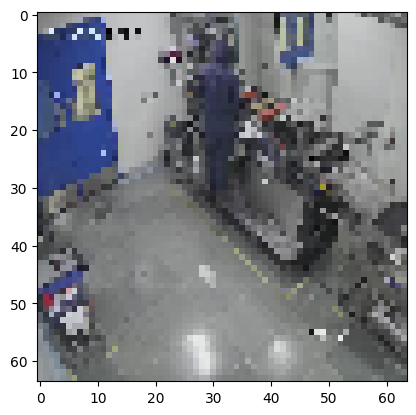

1/1 [==============================] - 0s 20ms/step
Predicted class index: 0


In [ ]:
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/ACG/Model_Train/Train_Data/Safe_images/images/frame_0_2023_04_15_16_52_PR07.JPEG"
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
x = tf.keras.preprocessing.image.img_to_array(img)
x = x / 255.0  # Normalize the image pixels to [0, 1]
x = tf.expand_dims(x, axis=0)  # Add batch dimension

# Display the image
plt.imshow(img)
plt.show()

# Predict the class of the image using the loaded model
y_pred = tiny_vgg.predict(x)[0]
class_idx = tf.argmax(y_pred)
print("Predicted class index:", class_idx.numpy())


In [5]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
stats

In [6]:
!wget https://developer.download.nvidia.com/compute/machine-learning/tensorrt/secure/8.0.1/local_repos/nv-tensorrt-repo-ubuntu2004-cuda11.4-trt8.0.1.6-ga-20210626_1-1_amd64.deb
!dpkg -i nv-tensorrt-repo-ubuntu2004-cuda11.4-trt8.0.1.6-ga-20210626_1-1_amd64.deb
!apt-key add /var/nv-tensorrt-repo-cuda11.4-trt8.0.1.6-ga-20210626_1-1/7fa2af80.pub
!apt-get update
!apt-get install -y --no-install-recommends libnvinfer8 libnvinfer-plugin8 libnvparsers8 libnvonnxparsers8 libnvinfer-bin


--2023-05-08 06:05:54--  https://developer.download.nvidia.com/compute/machine-learning/tensorrt/secure/8.0.1/local_repos/nv-tensorrt-repo-ubuntu2004-cuda11.4-trt8.0.1.6-ga-20210626_1-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://developer.download.nvidia.com/403.html [following]
--2023-05-08 06:05:54--  http://developer.download.nvidia.com/403.html
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.download.nvidia.com/403.html [following]
--2023-05-08 06:05:54--  https://developer.download.nvidia.com/403.html
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|

In [3]:
import os

# Set the LD_LIBRARY_PATH environment variable
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/lib/x86_64-linux-gnu:/usr/lib/x86_64-linux-gnu:/usr/local/lib/python3.7/dist-packages/tensorrt/lib'


In [6]:
!tensorflowjs_converter --input_format=keras /content/drive/MyDrive/ACG/Model_Train/trained_vgg_safety_case.h5 /content/drive/MyDrive/ACG/Model_Train


2023-05-08 06:15:19.682227: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
